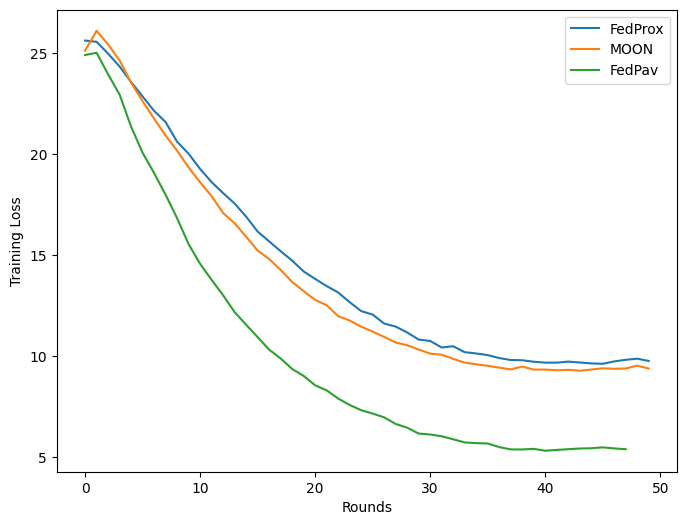

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import json

def compute_loss(method):
    method = method.lower()
    json_file = Path("results") / method / "training_history.json"
    with open(json_file, "r") as f:
        training_history = json.load(f)
    training_losses = training_history["losses"]
    num_clients = len(training_losses)
    rounds = len(training_losses[f'loss_C0'])
    train_loss = []
    for rounds_idx in range(rounds):
        round_total_loss = 0.0
        for client_idx in range(num_clients):
            round_total_loss += training_losses[f'loss_C{client_idx}'][rounds_idx]
        train_loss.append(round_total_loss / num_clients)
    return train_loss

methods = ["FedProx", "MOON", "FedPav"]

# Plotting the training loss for each method
fig, ax = plt.subplots(figsize=(8, 6))
for method in methods: 
    train_loss = compute_loss(method)
    ax.plot(train_loss, label=method)
ax.set_xlabel("Rounds")
ax.set_ylabel("Training Loss")
ax.legend()
plt.show()


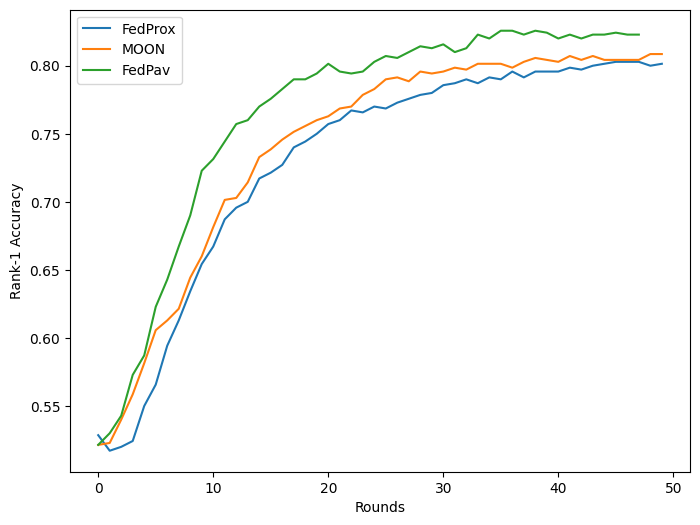

In [3]:
def compute_rank1(method):
    method = method.lower()
    json_file = Path("results") / method / "training_history.json"
    with open(json_file, "r") as f:
        training_history = json.load(f)
    training_accuracies = training_history["global_rank1"]
    rounds = len(training_accuracies)
    rank1 = []
    for rounds_idx in range(rounds):
        rank1.append(training_accuracies[rounds_idx])
    return rank1

# Plotting the global rank-1 accuracy for each method
fig, ax = plt.subplots(figsize=(8, 6))
for method in methods: 
    rank1 = compute_rank1(method)
    ax.plot(rank1, label=method)
ax.set_xlabel("Rounds")
ax.set_ylabel("Rank-1 Accuracy")
ax.legend()
plt.show()

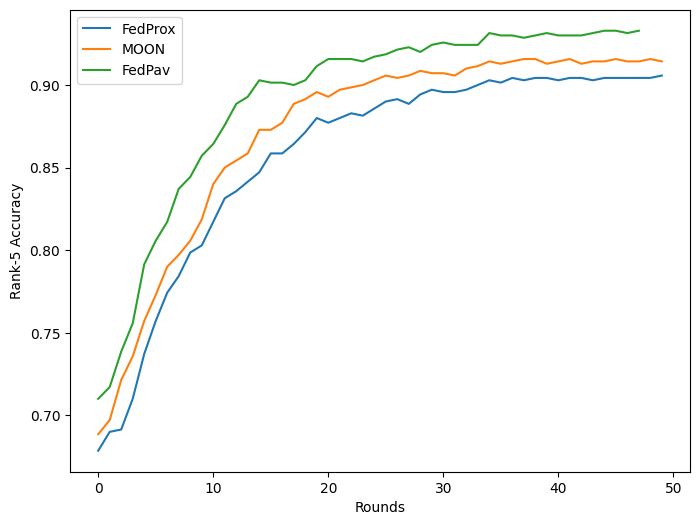

In [4]:
def compute_rank5(method):
    method = method.lower()
    json_file = Path("results") / method / "training_history.json"
    with open(json_file, "r") as f:
        training_history = json.load(f)
    training_accuracies = training_history["global_rank5"]
    rounds = len(training_accuracies)
    rank5 = []
    for rounds_idx in range(rounds):
        rank5.append(training_accuracies[rounds_idx])
    return rank5

# Plotting the global rank-5 accuracy for each method
fig, ax = plt.subplots(figsize=(8, 6))
for method in methods: 
    rank5 = compute_rank5(method)
    ax.plot(rank5, label=method)
ax.set_xlabel("Rounds")
ax.set_ylabel("Rank-5 Accuracy")
ax.legend()
plt.show()